In [1]:
# import libriries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# import the data

data=pd.read_csv(r"C:\Users\nimma\Downloads\New Year Sales Data.csv" ,encoding_errors='ignore')

data


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraPradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
# check the null values

data.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [5]:
# remove unnecerrary column

data.drop(columns=['Status','unnamed1'],inplace=True)

data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraPradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [6]:
data=data.rename(columns={'User_ID':'user_id','Cust_name':'cust_name','Product_ID':'product_id','Gender':'gender',
                          'Age Group':'age_group','Age':'age','Marital_Status':'marital_status','State':'state','Zone':'zone',
                          'Occupation':'occupation','Product_Category':'product_category','Orders':'orders','Amount':'amount'
                          })

data.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraPradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [7]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [8]:
data['marital_status']=data['marital_status'].replace({0:'Unmarried',1:'Married'})
data.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,AndhraPradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
# change specific row with gender
data['gender']=data['gender'].replace({"F":'Female','M':'Male'})
data.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,AndhraPradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [10]:
data['amount'].mean()

np.float64(9453.610857727557)

In [11]:
# remove null values

data.dropna(subset=['amount'],inplace=True)

In [12]:
# amount column convert inter type

data['amount']=data['amount'].astype(int)

In [13]:
data.dtypes

user_id              int64
cust_name           object
product_id          object
gender              object
age_group           object
age                  int64
marital_status      object
state               object
zone                object
occupation          object
product_category    object
orders               int64
amount               int64
dtype: object

In [14]:
data.describe()

,user_id,age,orders,amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [15]:

data['product_category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [16]:
data.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,Female,26-35,35,Married,AndhraPradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


In [17]:
# total revenue

Total_Revenue=data['amount'].sum()
print(Total_Revenue)

106249129


In [18]:
# total orders

Total_ordes=data['product_id'].nunique()

print(Total_ordes)

2350


In [19]:
# avg order value

avg_order_value=data['amount'].sum()/data['product_id'].nunique()

print(avg_order_value)

45212.395319148935


In [20]:
#avg revenue

avg_revenue=data['amount'].mean()
print(avg_revenue)

9453.610552540262


EDA(Exploratory Data Analysis)

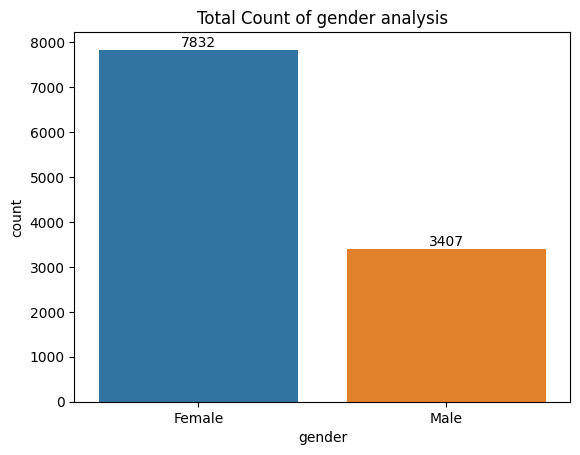

In [25]:
'''1. Gender Analysis 
1.Create a count plot for gender.  '''

a=sns.countplot(data=data,x='gender',hue='gender')
plt.title('Total Count of gender analysis')

for bar in a.containers:
    a.bar_label(bar)

Text(0.5, 1.0, 'Total purchase amount by gender')

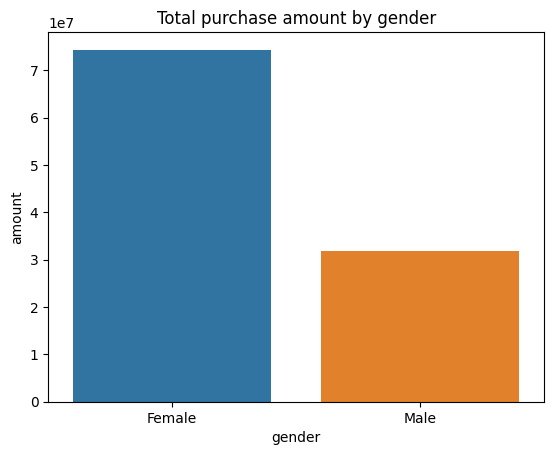

In [26]:
# 2.Plot a bar chart to show the total purchase amount by gender.

total_amount_gender=data.groupby(['gender'],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)

sns.barplot(data=total_amount_gender,x='gender',y='amount',hue='gender')
plt.title('Total purchase amount by gender')

above graphs shows the Female  has a higher purchasing power

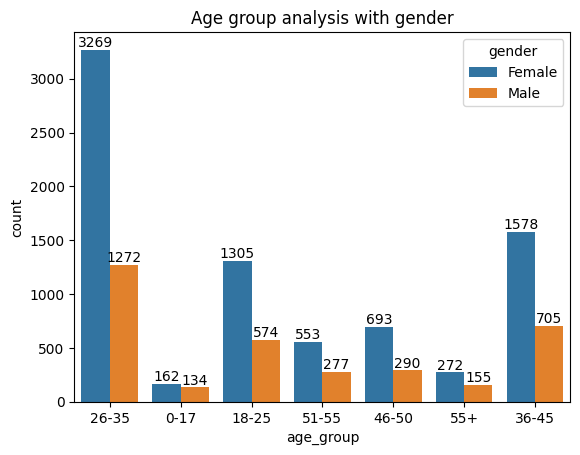

In [27]:
'''2. Age Group Analysis 
1.Plot a count plot of age groups with  gender.'''

a=sns.countplot(data=data,x='age_group',hue='gender')
plt.title('Age group analysis with gender')

for bar in a.containers:
    a.bar_label(bar)

Text(0.5, 1.0, 'Total purchase amount by age group')

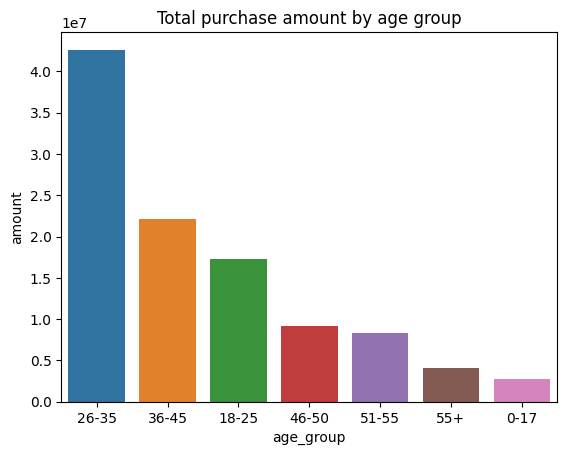

In [28]:
# 2. Plot a bar chart showing total purchase amount by age group

tota_amount_by_age_group=data.groupby(['age_group'],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)

sns.barplot(data=tota_amount_by_age_group ,x='age_group',y='amount',hue='age_group')
plt.title('Total purchase amount by age group')


above graphs shows the 26_35 age group has the most purchases

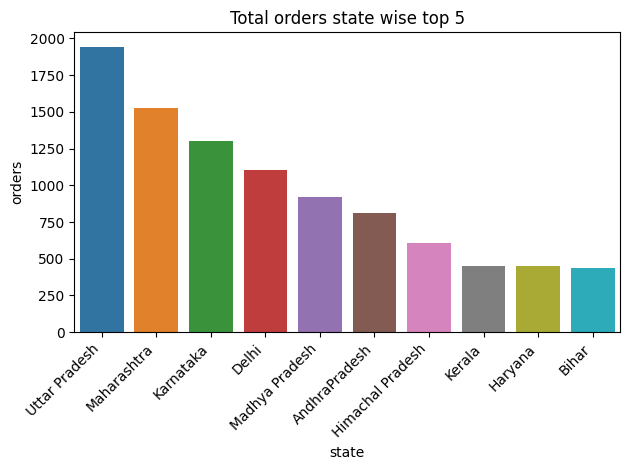

In [29]:
'''3. State Analysis 
1.Plot bar charts for the number of orders on state, focusing on 
the top 10 states. '''

state_wise_total_orders=data.groupby(['state'],as_index=False)['orders'].count().sort_values(by='orders',ascending=False).head(10)
plt.Figure(figsize=(10,6))
sns.barplot(data=state_wise_total_orders,x='state',y='orders',hue='state')
plt.xticks(rotation=45,ha='right')
plt.title('Total orders state wise top 5')
plt.xlabel('state', fontsize=10)
plt.ylabel('orders',fontsize=10)
plt.tight_layout()

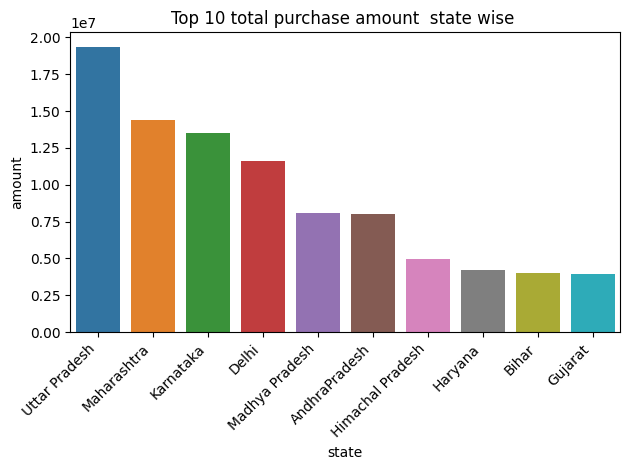

In [30]:
# 2.create bar chart for total amount by state, focusing on the top 10 states.

total_amount_state_wise=data.groupby(['state'],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False).head(10)
plt.Figure(figsize=(10,6))
sns.barplot(data=total_amount_state_wise ,x='state',y='amount',hue='state')
plt.title('Top 10 total purchase amount  state wise ')
plt.xticks(rotation=45,ha='right')
plt.xlabel('state',fontsize=10)
plt.ylabel('amount',fontsize=10)
plt.tight_layout()

above graphs shows the uttara pradesh,Maharashtra,Karnataka,delhi,madhya pradesh generate the highest number of orders and revenue

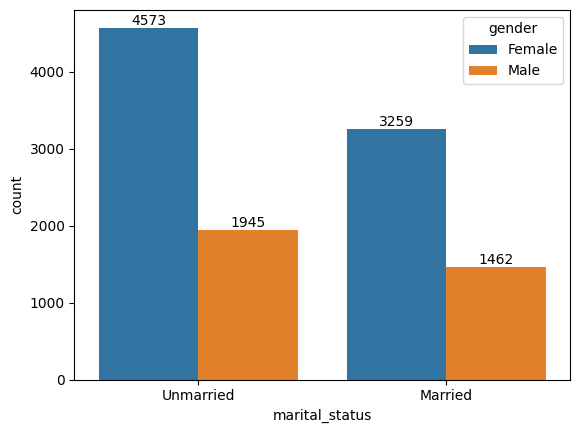

In [31]:
'''4. Marital Status Analysis 
1.Plot a count plot for marital status  with gender ''' 


a=sns.countplot(data=data,x='marital_status',hue='gender')

for bar in a.containers:
    a.bar_label(bar)

<Axes: xlabel='marital_status', ylabel='amount'>

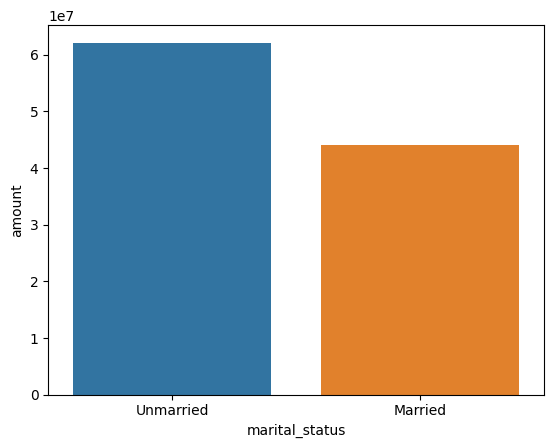

In [32]:
# 2.bar chart showing total amount spent by marital status, with gender as a hue. 

total_amount_by_marital_status=data.groupby(['marital_status'],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)

sns.barplot(data=total_amount_by_marital_status, x='marital_status',y='amount',hue='marital_status')

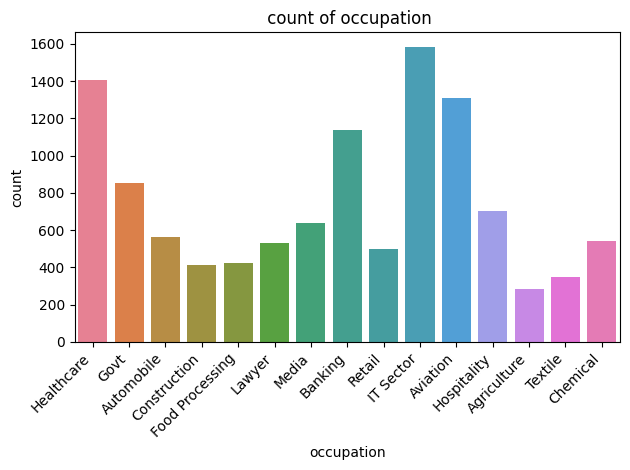

In [33]:
'''5. Occupation Analysis 
1. Create a count plot for occupation  '''

a=sns.countplot(data=data,x='occupation',hue='occupation')
plt.xticks(rotation=45,ha='right')
plt.title(' count of occupation')
plt.xlabel('occupation',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.tight_layout()




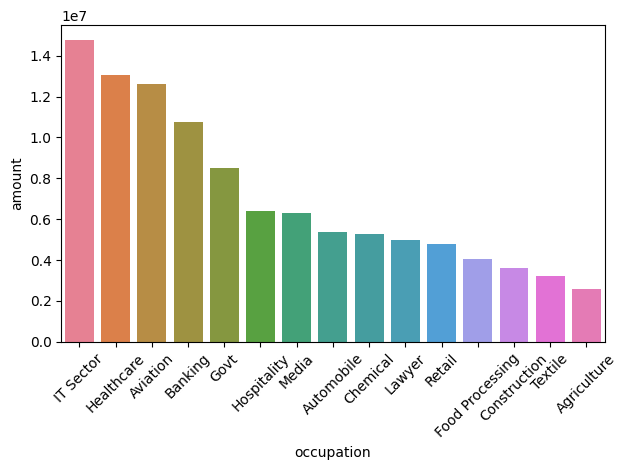

In [34]:
# 2.bar chart for total sales by occupation

total_sales_occupation=data.groupby(['occupation'],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)

sns.barplot(data=total_sales_occupation,x='occupation',y='amount',hue='occupation')
plt.xticks(rotation=45)
plt.tight_layout()


above graphs shows the IT Sector contribute most to sales

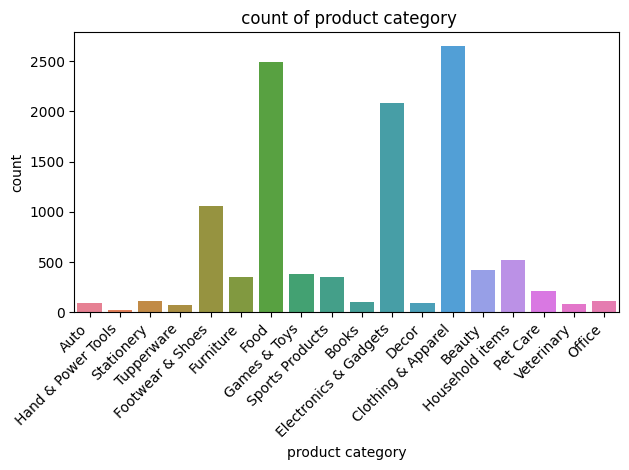

In [35]:
'''6. Product Category Analysis 
1. Create a count plot for product categories.'''

sns.countplot(data=data,x='product_category',hue='product_category')
plt.xticks(rotation=45,ha='right')
plt.title(' count of product category')
plt.xlabel('product category',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.tight_layout()


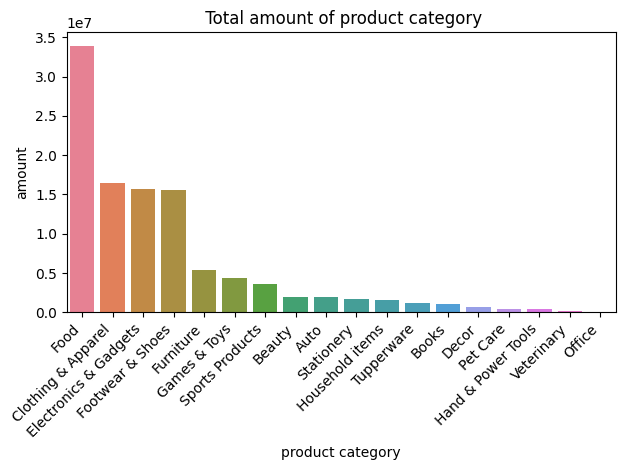

In [36]:
# 2.Create a bar chart to show the total amount by product category for the top categories. 

total_Sales_by_product_category=data.groupby(['product_category'],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)

sns.barplot(data=total_Sales_by_product_category,x='product_category',y='amount',hue='product_category')
plt.xticks(rotation=45,ha='right')
plt.title(' Total amount of product category')
plt.xlabel('product category',fontsize=10)
plt.ylabel('amount',fontsize=10)
plt.tight_layout()

above graphs shows the clothing & apperal  most popular, and Food ones generate the most revenue?

In [37]:
# export

data.to_csv('new_year_sales_data.csv')

In [38]:
from sqlalchemy import create_engine

# step 1 connect to postgress

username="postgres"
password="Manasa"
host="localhost"
port="5432"
database="New_Year"

#engine=create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name="new_year"


data.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"data suceffully loaded into table '{table_name}' in database '{database}'")

data suceffully loaded into table 'new_year' in database 'New_Year'
